In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
#from utils import XyScaler
#from roc_curve2 import roc_curve

In [3]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/ready12_24_train.csv') 

In [4]:
df_withID

,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,City_Type2_x,Job Type_x,online_score,y_target,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,Category 1,Category 2,Category 3
0,6578,4.0,0.0,0.0,0.0,2.0,23384,9999,0,1.0,-25.0,278,253,34,59,Third,G,2100
1,6532,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,-24.0,99,75,161,185,First,F,2100
2,6543,4.0,0.0,0.0,0.0,2.0,23384,9999,0,0.0,-60.0,355,295,711,771,First,F,2100
3,6580,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,4.0,12,16,19,15,First,E,2100
4,6570,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,69.0,146,215,82,13,First,E,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,6538,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,-204.0,16,-188,188,392,First,F,2100
75274,6528,0.0,0.0,0.0,0.0,0.0,1729,9999,0,1.0,-73.0,31,-42,1,74,Third,G,2100
75275,6529,0.0,0.0,0.0,0.0,0.0,23384,9999,0,1.0,2.0,10,12,6,4,Second,A,2100
75276,6529,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,27.0,13,40,31,4,Second,A,2100


In [5]:
c = df_withID[(df_withID['Var1'] ==0) & df_withID['y_target']==0]
len(c)

57481

In [6]:
g={}
for i in df_withID['Category 3'].values:
    if i not in g:
        g[i]=1
    else:
        g[i]+=1
print(g.items())

dict_items([(2100, 74871), (1100, 407)])


In [7]:
from preprocessing import drop_cols , one_hot_encoding , scale
data = drop_cols(df_withID) # drop cols

df_encode = one_hot_encoding(data, columns = ['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score'])
df_encode1 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode2 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode3 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode4 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 


In [8]:
df_encode3.drop([
                                        'BFSI',
                                'Broadcasting',
                                  'Consulting',
                                   'Education',
                                        'Food',
                                      'Health',
                               'Manufacturing',
                                      'Others',
                                      'Retail',
                           'Software Industry',
                                  'Technology',
                                     'Telecom',
                                   'Transport'],axis=1,inplace=True)

/home/allen/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df_encode4 =df_encode3
df_encode2 =df_encode3
df_encode1 =df_encode3

In [23]:
df_encode4['y_target'] = df_withID['y_target'].values
df_encode1['y_target'] = df_withID['y_target'].values
df_encode2['y_target'] = df_withID['y_target'].values

<ipython-input-23-4b672258a12f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode4['y_target'] = df_withID['y_target'].values
<ipython-input-23-4b672258a12f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode1['y_target'] = df_withID['y_target'].values
<ipython-input-23-4b672258a12f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [24]:
df_encode4

,Var1,Var2,Var3,Var4,Var5,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,1036,1216,1217,1352,1704,1729,2517,2662,23384,A,C,D,E,F,G,2100,Second,Third,1,2,3,4,9999,y_target
0,4.0,0.0,0.0,0.0,2.0,-25.0,278,253,34,59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1.0
1,0.0,0.0,0.0,0.0,0.0,-24.0,99,75,161,185,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0
2,4.0,0.0,0.0,0.0,2.0,-60.0,355,295,711,771,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0
3,0.0,0.0,0.0,0.0,0.0,4.0,12,16,19,15,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0
4,0.0,0.0,0.0,0.0,0.0,69.0,146,215,82,13,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,0.0,0.0,0.0,0.0,0.0,-204.0,16,-188,188,392,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0
75274,0.0,0.0,0.0,0.0,0.0,-73.0,31,-42,1,74,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1.0
75275,0.0,0.0,0.0,0.0,0.0,2.0,10,12,6,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1.0
75276,0.0,0.0,0.0,0.0,0.0,27.0,13,40,31,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.0


In [12]:
from numpy import argmax 

In [13]:
import seaborn as sns

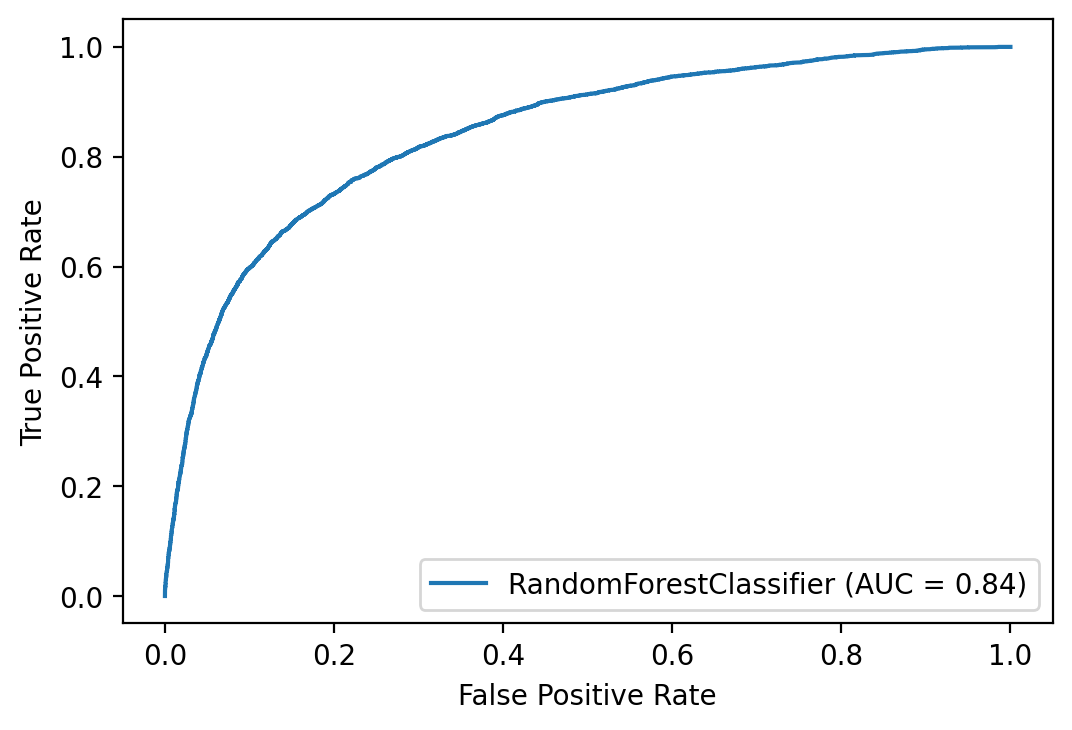

[[12446  1139]
 [ 2292  2943]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

y = df_encode3.pop('y_target')
X = df_encode3
X = X.drop('Var3',axis=1)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])
logmodel_disp = plot_roc_curve(rfc, X_test7, y_test7)
plt.show()
print(confusion_matrix(y_test7,rfc_preds)) 

In [15]:
print(classification_report(y_test7,rfc_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     13585
         1.0       0.72      0.56      0.63      5235

    accuracy                           0.82     18820
   macro avg       0.78      0.74      0.76     18820
weighted avg       0.81      0.82      0.81     18820



In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train7,y_train7)

DecisionTreeClassifier()

In [18]:
predictionz = dtree.predict(X_test7)
print(classification_report(y_test7,predictionz))
print(confusion_matrix(y_test7,predictionz)) 

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     13585
         1.0       0.59      0.55      0.57      5235

    accuracy                           0.77     18820
   macro avg       0.71      0.70      0.70     18820
weighted avg       0.76      0.77      0.76     18820

[[11570  2015]
 [ 2380  2855]]


In [19]:
from IPython.display import Image

In [20]:
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot

featuresz = list(X_test7.columns[0:])
print(len(featuresz))

32


In [21]:

#### DONT RUN THIS CELL ##### 
# dot_data = StringIO()
# export_graphviz(dtree, feature_names=featuresz,out_file = dot_data,filled=True,rounded=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph[0].create_png())

In [25]:
ynotx = df_encode1.pop('y_target')
train_test_split(ynotx, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    df_encode1,ynotx,test_size = .3, random_state=101)


from sklearn.linear_model import LogisticRegression
w = {0:59, 1:41} 
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=w , random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 59, 1: 41}, n_jobs=1)

In [26]:
pure_probaz = logmodelx.predict_proba(X_test)[:,1]
predictionsz = logmodelx.predict(X_test)

In [27]:
predsz, preds2z = pure_probaz >= .35 ,pure_probaz >= .4
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 
print(confusion_matrix(y_test,predsz))
print(confusion_matrix(y_test,preds2z))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85     16366
         1.0       0.60      0.59      0.59      6218

    accuracy                           0.78     22584
   macro avg       0.72      0.72      0.72     22584
weighted avg       0.78      0.78      0.78     22584

[[13765  2601]
 [ 2453  3765]]
[[13942  2424]
 [ 2569  3649]]


In [ ]:
# for name, coef in zip(preds2z[1:], logmodelx.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [ ]:
d={}
for i in preds2z:
    if i not in d:
        d[i]=1
    else:
        d[i]+=1
print(d)

In [ ]:
logmodelx.coef_

In [28]:
tp, fn, fp, tn = confusion_matrix(y_test,preds2z).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 13942 2424 2569 3649


In [ ]:
# so it seems like its 1,4 (the FN,FP)  which are called 'True'
# all 'true' are the ones miss classified (ie are wrong). So could create a map / lambda
# Lambda would reverse it, i.e. if row is 'True' impute the string'wrong' onto the test set 

In [ ]:
+3649 +2424

In [31]:
X_test['Proba'] = pure_probaz
X_test['Prediction'] = predictionsz
X_test['y_target'] = y_test

<ipython-input-31-4f1f47c192aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Proba'] = pure_probaz
<ipython-input-31-4f1f47c192aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Prediction'] = predictionsz
<ipython-input-31-4f1f47c192aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [32]:
df_1 = X_test[(X_test['y_target']==1) & (X_test['Prediction']==1)]
df_0 = X_test[(X_test['y_target']==0) & (X_test['Prediction']==0)]
df_10 = X_test[(X_test['y_target']==1) & (X_test['Prediction']==0)]
df_01 = X_test[(X_test['y_target']==0) & (X_test['Prediction']==1)]

In [33]:
df_10

,Var1,Var2,Var3,Var4,Var5,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,1036,1216,1217,1352,1704,1729,2517,2662,23384,A,C,D,E,F,G,2100,Second,Third,1,2,3,4,9999,Proba,Prediction,y_target
5473,0.0,0.0,0.0,0.0,0.0,-14.0,508,494,171,185,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.115535,0.0,1.0
53150,0.0,0.0,0.0,0.0,0.0,0.0,86,86,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0.285357,0.0,1.0
33363,1.0,0.0,0.0,0.0,0.0,-159.0,785,626,46,205,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0.329950,0.0,1.0
9169,0.0,0.0,0.0,0.0,0.0,-34.0,18,-16,151,185,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.113467,0.0,1.0
44103,0.0,0.0,0.0,0.0,0.0,-4.0,321,317,55,59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0.455607,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.0,0.0,0.0,0.0,0.0,-26.0,421,395,163,189,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.079007,0.0,1.0
16258,0.0,0.0,0.0,0.0,0.0,5.0,242,247,18,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.060728,0.0,1.0
8709,2.0,0.0,0.0,0.0,1.0,-2.0,950,948,1,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.063867,0.0,1.0
44630,0.0,0.0,0.0,0.0,0.0,-38.0,4,-34,21,59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0.449366,0.0,1.0


In [34]:
df_01

,Var1,Var2,Var3,Var4,Var5,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,1036,1216,1217,1352,1704,1729,2517,2662,23384,A,C,D,E,F,G,2100,Second,Third,1,2,3,4,9999,Proba,Prediction,y_target
15214,0.0,0.0,0.0,0.0,0.0,42.0,391,433,100,58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0.566626,1.0,0.0
52318,0.0,0.0,0.0,0.0,0.0,-158.0,11,-147,593,751,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.517611,1.0,0.0
18632,0.0,0.0,0.0,0.0,0.0,-162.0,820,658,589,751,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.628642,1.0,0.0
14428,0.0,0.0,0.0,0.0,0.0,-327.0,0,-327,424,751,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.600902,1.0,0.0
27994,0.0,0.0,0.0,0.0,0.0,-22.0,162,140,17,39,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0.525631,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63096,0.0,0.0,0.0,0.0,0.0,13.0,597,610,17,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0.510489,1.0,0.0
64716,0.0,0.0,0.0,0.0,0.0,-307.0,632,325,444,751,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.608477,1.0,0.0
60866,0.0,0.0,0.0,0.0,0.0,-7.0,242,235,744,751,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.637516,1.0,0.0
28316,0.0,0.0,0.0,0.0,0.0,4.0,207,211,8,4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0.500328,1.0,0.0


"\nchecker[checker['y_target'] ==1]['delta_first_reg'].hist(alpha=.6)\nchecker[checker['y_target'] ==0]['delta_first_reg'].hist(alpha=.6)\n"

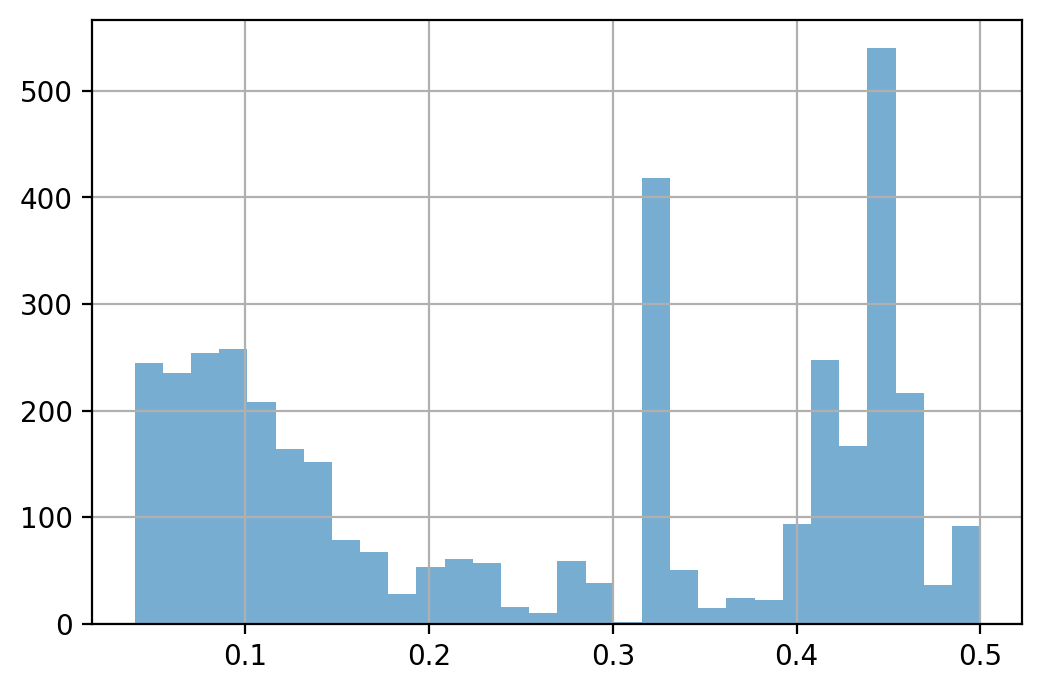

In [35]:
#df_01['Proba'].hist(alpha=.6, bins=30)
df_10['Proba'].hist(alpha=.6, bins=30)
'''
checker[checker['y_target'] ==1]['delta_first_reg'].hist(alpha=.6)
checker[checker['y_target'] ==0]['delta_first_reg'].hist(alpha=.6)
'''

In [ ]:
df_01.describe()

In [ ]:
df_10.describe()

In [ ]:
frames = [df_01,df_10]
frames2 = [df_1,df_0]
df_f = pd.concat(frames)
df_f2 = pd.concat(frames2)

In [ ]:
df_10_ = df_f.copy()
df_10_2 = df_f2.copy()
#Making copies to do KNN
del df_10_['Prediction']
del df_10_['Proba']
del df_10_2['Prediction']
del df_10_2['Proba']

In [ ]:
# yk = df_encode1.pop('y_target')
# Xk = df_encode1 
yk = df_10_.pop('y_target')
Xk = df_10_

X_traink, X_testk, y_traink, y_testk = train_test_split(Xk, yk, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_traink,y_traink)

In [ ]:
pred = knn.predict(X_testk)

In [ ]:
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred))

In [ ]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_traink,y_traink)
    pred_i = knn.predict(X_testk)
    error_rate.append(np.mean(pred_i != y_testk))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.title('KNN Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_traink,y_traink)
pred = knn.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_traink,y_traink)
pred = knn.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_traink,y_traink)
pred = knn.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_traink,y_traink)
pred = knn.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
yk = df_10_2.pop('y_target')
Xk = df_10_2
X_traink, X_testk, y_traink, y_testk = train_test_split(Xk, yk, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)

error_rate = []

for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_traink,y_traink)
    pred_i = knn2.predict(X_testk)
    error_rate.append(np.mean(pred_i != y_testk))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.title('KNN Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

In [ ]:
# if I am positve 20 and they are negative 40 == 60 (really I am 60 off nd 60 better)
# if I am postive 20 and they are positive 40 == -20 (really I am 20 off nd 20 better)
# if I am negative 20 and they are negative 40 == 20 (really I am 20 off nd 20 better)
# if I am negative 20 and they are positive 40 == -60 (really I am 20 off nd 20 worse)
# if I am positive 20 and they are positive 40 == -60 (really I am 20 off nd 20 worse)
# # Myerror 40 - their error -20  = 60 people difference = positive value means I did worse like Golf

In [ ]:
/home/allen/Galva/capstones/capstone2/data/data_by_feature

In [36]:
 
results_by_camp1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t1.csv')
results_by_camp2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t2.csv')
city1_XG1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/XG_CITY_t2_weight1.csv')
city2_XG2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/XG_CITY_t2.csv')

In [37]:
city1_XG1.head(10)

,Health_Camp_ID,False Positive,False Negative,y_counts_test,y_counts_train,test_size,train_size
0,6587,710,1380,2115,5050,9963,23245
1,6587,160,271,433,962,1278,2981
2,6587,84,194,344,727,994,2318
3,6587,167,323,514,1182,1636,3815
4,6587,246,480,759,1682,2482,5791
5,6586,115,200,319,763,1033,2408
6,6587,128,258,405,880,1208,2817
7,6586,177,316,430,996,1308,3052
8,6587,264,431,594,1448,1842,4297
9,6587,126,184,272,659,843,1967


In [38]:
city2_XG2.head(10)

,Health_Camp_ID,False Positive,False Negative,y_counts_test,y_counts_train,test_size,train_size
0,6587,929,1495,2115,5050,9963,23245
1,6587,220,312,433,962,1278,2981
2,6587,149,240,344,727,994,2318
3,6587,243,354,514,1182,1636,3815
4,6587,380,531,759,1682,2482,5791
5,6586,180,234,319,763,1033,2408
6,6587,186,277,405,880,1208,2817
7,6586,256,339,430,996,1308,3052
8,6587,339,461,594,1448,1842,4297
9,6587,181,207,272,659,843,1967


In [54]:
def create_cols(dataframe):
  
    dataframe['Historic Train'] = dataframe['train_size'].apply(lambda x: x *.2)  #20% historic attendance rate
    dataframe['Historic Test'] = dataframe['test_size'].apply(lambda x: x *.2) 

    dataframe['Ratio'] = dataframe['False Negative']/dataframe['False Positive']
    dataframe['Train Percent Attends'] = dataframe['y_counts_train']/dataframe['train_size']
    dataframe['Test Percent Attends'] = dataframe['y_counts_test']/dataframe['test_size']

    dataframe['True Y - Historic Train'] =  dataframe['y_counts_train'] - dataframe['Historic Train'] 
    dataframe['Their Error'] =  dataframe['y_counts_test'] - dataframe['Historic Test']  
                                                   
    dataframe['Total Model Error'] = dataframe['False Positive'] + dataframe['False Negative']
    dataframe['Total Y'] = dataframe['y_counts_train'] + dataframe['y_counts_test']
    tme = dataframe['Total Model Error'].values 
    ht = dataframe['Their Error'].values

    combo = list(zip(tme,ht))
    model_minus_historic = []
    for i in combo:
        if i[1] > 0 and i[0] < 0:
            get = i[0] - i[1] + .069 
            model_minus_historic.append(get)
        else:
            get = i[0] - i[1]
            model_minus_historic.append(get)
    

    dataframe['Model - Historic Test'] = model_minus_historic 


    return dataframe

In [55]:
df_camp1 = create_cols(results_by_camp1)
df_camp2 = create_cols(results_by_camp2)
df_xg_city1 = create_cols(city1_XG1)
df_xg_city2 = create_cols(city2_XG2) 


In [56]:
df_xg_city1['test_size'] = df_xg_city1.astype(int)

In [57]:
df_camp1['False Positive'].sum()

2571

In [58]:
df_camp1['False Negative'].sum()

4320

In [59]:
#  [[5201   29] TN/FN
#  [1317   95]] TP/FP
    
# [[4111 1119]  TN/FN
#  [ 257 1155]] TP/FP


In [60]:
results_by_city2['Actual Attendnce'] =  results_by_city2['Y Count'] / results_by_city2['Test Size']

NameError: name 'results_by_city2' is not defined

In [95]:
df_ = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/ready12_24_train.csv') 
df_['Tups'] = list(zip(df_withID.City_Type2_x,df_withID.Health_Camp_ID))
df_['Tups2'] = list(zip(df_withID['Camp Length'].values,df_withID.Health_Camp_ID))

In [96]:
d2={}
for i in df_['Tups2'].values:
    key = i[1]
    value = i[0]
    if key not in d2.keys():
        d2[key]=value

In [97]:
df_.columns

Index(['Health_Camp_ID', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'City_Type2_x', 'Job Type_x', 'online_score', 'y_target',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length', 'Category 1',
       'Category 2', 'Category 3', 'Tups', 'Tups2'],
      dtype='object')

In [98]:
df_camp2['City'] = df_camp2['Health_Camp_ID'].map(d)
df_camp2['Camp Length '] = df_camp2['Health_Camp_ID'].map(d2)


Text(0.5, 1.0, 'Test Size, Attendance Rate By Camp Location')

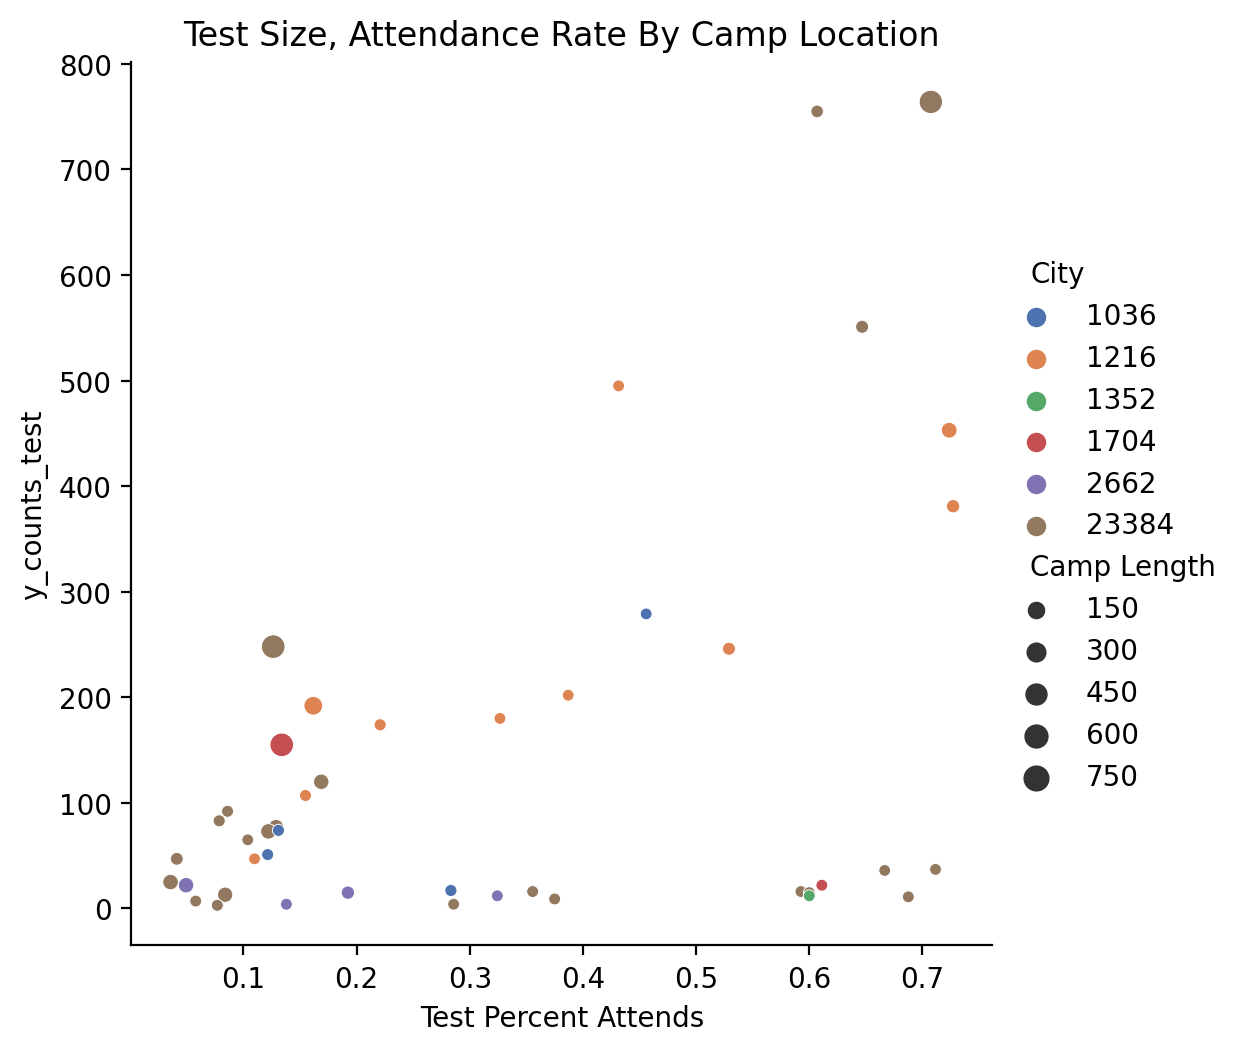

In [111]:
g= sns.relplot(x='Test Percent Attends', y='y_counts_test', hue= 'City', size='Camp Length ', data=df_camp2,palette="deep", kind='scatter')
#plt.legend(loc='best')
plt.title('Test Size, Attendance Rate By Camp Location')

In [ ]:
checkerxx = checker.copy()

In [ ]:
df_encode2.drop([
                                        'BFSI',
                                'Broadcasting',
                                  'Consulting',
                                   'Education',
                                        'Food',
                                      'Health',
                               'Manufacturing',
                                      'Others',
                                      'Retail',
                           'Software Industry',
                                  'Technology',
                                     'Telecom',
                                   'Transport'],axis=1,inplace=True)

In [ ]:
checker = checker.copy()
# checker = checker.drop(['Var4','11.0', '12.0', '13.0', '14.0','1217', '1352',
#        '1704', '1729', '2517', '2662','7.0','4.0','6.0','3.0'],axis=1)
checker1 = checker.copy() 

checker3 = checker.copy() 
checker4 = checker.copy() 
checker5 = checker.copy() 
checker7 = checker.copy()  
checker8 = checker.copy() 
checker9 = checker.copy() 
checker10 = checker.copy() 
checker11 = checker.copy()  

# checker_base = checker.copy() 
# trump= [ 'delta_first_reg',
#        'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
#        'Camp_Length', 'Second', 'Third', '1036', '1216', '23384', 'B', 'C',
#        'D', 'E', 'F', 'G', '2100', '2.0', '5.0', '8.0', '9.0', '10.0',
#        '9999.0', '1', '2', '3', '4']
# checker_base   = checker.drop(trump, axis=1)
# cb1 = checker_base.copy() 
# cb2 = checker_base.copy()
# cb3 = checker_base.copy() 
# cb4 = checker_base.copy() 
# cb5 = checker_base.copy()  
# cb7 = checker_base.copy()  
# cb9 = checker_base.copy()  
# cb10 = checker_base.copy()  
# cb11 = checker_base.copy()  
# cb12 = checker_base.copy()  
# cb20 = checker_base.copy()  

In [ ]:
y_to_test = df_encode2.pop('y_target') 

In [ ]:
ynotx = y_to_test 
train_test_split(ynotx, shuffle=False) 

X_train,X_test,y_train,y_test = train_test_split(
    df_encode2,ynotx,test_size = .2, random_state=101)


from sklearn.linear_model import LogisticRegression
w = {0:60, 1:40} 
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=w , random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

In [ ]:
pure_probx= logmodelx.predict_proba(X_test)[:,1]
predsx = logmodelx.predict(X_test)

In [ ]:
print(pure_probx)

In [ ]:
predsx  <= .35

for name, proba in zip(predsx[1:], pure_probx):
    print("{0}: {1:0.4f}".format(name, proba))

In [ ]:
print(len(predsx), len(X_train), len(X_test))
X_train_len = len(X_train)
X_test_len = len(X_test)
print(X_train_len - X_test_len)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predsx) ) 

In [ ]:
print(confusion_matrix(y_test,predsx)) 

In [ ]:
print(classification_report(y_test,predsx) ) 

In [ ]:
to_try = confusion_matrix(y_test,predsx)
print(to_try) 

In [ ]:
(.7+ .36) / (.8 * .94)

In [ ]:
checker5

In [ ]:
checker1.columns

In [ ]:
ynot1 = checker1.pop('y_target')
 

train_test_split(ynot1, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker1,ynot1,test_size = .2, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
weights = {0:1.0, 1:10.0}
logmodel = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=weights, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=-1, l1_ratio=None ) 
logmodel.fit(X_train, y_train)

In [ ]:
pure_probaz = logmodel.predict_proba(X_test)[:,1]
predictionsz = logmodel.predict(X_test)

In [ ]:
pure_probaz  
#predictionsz

In [ ]:
roc_auc_logmodel = roc_auc_score(y_test, logmodel.fit(X_train, y_train).predict_proba(X_test)[:, -1]) 
print(roc_auc_logmodel)

In [ ]:
logmodel_disp = plot_roc_curve(logmodel, X_test, y_test)
plt.show()

In [ ]:
predsz, preds2z = pure_probaz >= .35 ,pure_probaz >= .5
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 
# for name, coef in zip(preds2z[1:], logmodel.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 

In [ ]:
print(classification_report(y_test,predsz) )

In [ ]:
print(confusion_matrix(y_test,preds2z))  

In [ ]:
print(confusion_matrix(y_test,predsz)) 

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


In [ ]:
features = ['Var1'] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = ['Camp_Length' ] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.4)

In [ ]:
this will break 

In [ ]:
features = ['Camp Start Date - Registration Date'] 

'''#, 'Var3', 'Var4', 'Var5'
, , 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
       'Registration Date - First Interaction',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)


In [ ]:
features = [
        'Camp Start Date - First Interaction',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
        'Camp End Date - Registration Date',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
       'Camp Length',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
y1 = checker10.pop('y_target') 

In [ ]:
kfold = KFold(n_splits=5)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(checker10, y1)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

In [ ]:

#ynot1 = cb12.pop('y_target')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_encode1.pop('y_target')
X = df_encode1 

# y = cb7.pop('y_target')
# X = cb7

X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])
logmodel_disp = plot_roc_curve(rfc, X_test7, y_test7)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_encode1.pop('y_target')
X = df_encode1 

# y = cb7.pop('y_target')
# X = cb7

X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])
logmodel_disp = plot_roc_curve(rfc, X_test7, y_test7)
plt.show()
print(confusion_matrix(y_test7,rfc_preds)) 

In [ ]:
print(roc_auc)

In [ ]:
#plot_partial_dependence(rfc, features=[5, 6, 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[5, 6,  ], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[ 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[9,10], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
16 print 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# y = checker4.pop('y_target')
# X = checker4

# y = cb4.pop('y_target')
# X = cb4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test, y_test)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)


print(classification_report(y_test,rfc_preds) ) 
print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()
svc_preds = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)[:,1]

predsx , preds2x = svc_proba  >= .5 , svc_proba  >= .4

print(classification_report(y_test,svc_preds) )
print(confusion_matrix(y_test,svc_preds)) 
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [ ]:
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
y_trained_sum_of1 = [1 for x in y_train.values if x==1]
print(sum(y_trained_sum_of1), len(y_train.values))
y_test_sum_of1 = [1 for x in y_test.values if x==1]
print(sum(y_test_sum_of1),'y_test', len(y_test.values))

In [ ]:
# try and recombine data frame to examine outputs. 

In [ ]:
checker8.columns

In [ ]:
188543.2 - 117688


In [ ]:
checker7.info()

In [ ]:
20552/102000

In [ ]:
14711*20  * .2

In [ ]:
def cm_to_inch(value):
    return value/2.54

In [ ]:
importances = rfc.feature_importances_ [:5]
indices = np.argsort(importances)[::-1]
print(len(importances),len(indices))
print(importances,indices)

In [ ]:
col_names = X_test.columns 
importances = rfc.feature_importances_  
indices = np.argsort(importances)[::-1]
Random_Forest = 'Random Forest'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
print(sum(importances))

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
y9 = df_encode2.pop('y_target')
x9 = df_encode2

In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x9, y9, test_size=0.2, random_state=101) 

In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train9,label=y_train9) 
test_dmatrix = xgb.DMatrix(data=X_test9,label=y_test9)

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
#evallist = [(test_dmatrix, 'eval'), (train_dmatrix, 'train')] ,evallist,early_stopping_rounds=50
xgb_one = xgb.train(params,train_dmatrix )
# AssertionError: Must have at least 1 validation dataset for early stopping. 

In [ ]:
ypred = xgb_one.predict(test_dmatrix, ntree_limit =xgb_one.best_ntree_limit )

In [ ]:
col_names = X_test9.columns 
importances = xgb_one.feature_importances_  
indices = np.argsort(importances)[::-1]
Random_Forest = 'XGBClassifier'
plt.bar(range(X_test9.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
from xgboost import XGBRegressor
from pdpbox import pdp
 #,'interaction_regreister_delta', 
#            'delta_first_start', 'delta_reg_end',
#            'Camp_Length', 
# my_model = XGBRegressor()
# my_model.fit(X_train9, y_train9)
# feature = ['Second', 'Third']
# p = pdp.pdp_isolate(my_model, X_train9, X_train9.columns, feature)
# pdp.pdp_plot(p, feature)

In [ ]:
print(ypred)
#print(confusion_matrix(y_test9,ypred  ))  

In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc', label_encoder=False)
xg_reg1.fit(X_train9,y_train9) 

In [ ]:
xg_reg1_predict = xg_reg1.predict(X_test9) 
xg_reg1_proba = xg_reg1.predict_proba(X_test9)[:,1]

preds_xg1_thresh1, preds2_xg1_thresh2 = xg_reg1_proba >=0.65 , xg_reg1_proba >=0.4

xg_reg1_disp = plot_roc_curve(xg_reg1 , X_test9, y_test9)
plt.show()




In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
xg_reg1_disp2 = plot_roc_curve(xg_reg1, X_test9, y_test9, ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)

 
plt.show()

In [ ]:
print(classification_report(y_test9,preds_xg1_thresh1 ) )
print(classification_report(y_test9,preds2_xg1_thresh2 ) )

In [ ]:
print(confusion_matrix(y_test9,preds_xg1_thresh1))  
print(confusion_matrix(y_test9,preds2_xg1_thresh2))  

In [ ]:
[[6166 1409]
 [ 872 2092]]

[[6956  619]
 [1372 1592]]


In [ ]:
pint45 = 1409+2092
pint35 = 619+1592 
print(pint45,pint35)

In [ ]:

for i in ok:
    for ii in i :
        print(f'this is a thing from i -> {ii} being printed')
        
        

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

# men_std = [2, 3, 4, 1, 2] # currently not plotting std
# women_std = [3, 5, 2, 3, 3] # currently no plotting std

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,bottoms, width, label='Incorrectly predicted')
ax.barh(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()


In [ ]:
# thought for above - should I plot 4 columns - one for each model -  showing the FP and FN split ? 

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [1326,942] # bottom part of column
tops = [ 6633,1638 ] # Top part of column

width = 0.15       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, bottoms,width,label='Incorrectly predicted')
ax.bar(labels, tops, width, label='Correctly predicted',bottom=tops,)

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc')

In [ ]:
xg_reg1.fit(X_train,y_train)

In [ ]:
tree1_predict = xg_reg1.predict(X_test) 
tree1_proba = xg_reg1.predict_proba(X_test)

In [ ]:

col_names = X_test.columns 
importances = xg_reg1.feature_importances_
indices = np.argsort(importances)[::-1]
title = 'XG Boost Classifier'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(title))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
xg_reg1_disp = plot_roc_curve(xg_reg1, X_test, y_test)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
uh = xgb_clf.predict(X_test) 
pred_proba = xgb_clf.predict_proba(X_test)

In [ ]:
probs = pred_proba[:,1] 

In [ ]:
col_names = X_test.columns 
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xgb_clf'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))

In [ ]:
# plotdf = pd.DataFrame({"P1":uh ,"P2":probs})
# # ax = plotdf.plot.bar(color=["SkyBlue", "IndianRed"], rot=0, title= "COmpare Results")
# # plt.show()

# df = plotdf.copy()
# df.info()

In [ ]:
df1=df.copy()
for i in to_transfer:
    df1[i] = X_test[i]
print(df1.info())

In [ ]:
 # https://stackoverflow.com/questions/57730192/how-to-save-gridsearchcv-xgboost-model

In [ ]:
y5 =checker5.pop('y_target')
X5= checker5

In [ ]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 8, n_estimators = 10, eval_metric = 'auc')

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
print(xg_reg.predict_proba(X_test)) 

In [ ]:
preds

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
cv_results[45:]

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
# xgb.plot_tree(xg_reg,num_trees=0) # plt.rcParams['figure.figsize'] = [50, 10] # plt.show()

In [ ]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
print(checker3.shape)

In [ ]:
col_names = X_test.columns 
importances = xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xg_reg'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
dataset = np.genfromtxt('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv',delimiter=',' ,skip_header=True)

In [ ]:
print(dataset.shape)

In [ ]:
selector = [x for x in range(dataset.shape[1]) if x !=5]
selector2 = [x for x in range(dataset.shape[1]) if x ==5]

In [ ]:
y = dataset[:,selector]
y2 = dataset[:,selector2]

In [ ]:
y.shape

In [ ]:
x = np.delete(dataset,6,axis=1)

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim = 46, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try: 
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e, 'BTW ***********************************************')

In [ ]:
model.fit(x=y,y=y2, epochs=20, verbose=1)

In [ ]:
print(y2[:10])

In [ ]:
predictions2 = model.predict(y)
print(predictions2[:10].T)